In [34]:
import pandas as pd
import numpy as np
import requests
from lxml import etree
from scipy.io import wavfile

In [5]:
resp = requests.get('http://localhost:5000/sample?from=1&count=2')
root = etree.fromstring(resp.content)

In [11]:
time = pd.to_datetime(root[1][0][0][0][0].attrib['timestamp'])
time

Timestamp('2023-11-07 04:14:38.749250+0000', tz='UTC')

In [16]:
resp2 = requests.get('http://localhost:5000/sample?from=1&count=2')
root2 = etree.fromstring(resp2.content)

In [17]:
time2 = pd.to_datetime(root2[1][0][0][0][0].attrib['timestamp'])
time2

Timestamp('2023-11-07 04:47:41.845373+0000', tz='UTC')

In [19]:
time1 = pd.to_datetime('2023-11-07 04:14:38.749250+0000')
time2 = pd.to_datetime('2023-11-07 04:47:41.845373+0000')
print(time1, time2)

2023-11-07 04:14:38.749250+00:00 2023-11-07 04:47:41.845373+00:00


In [5]:
chatter_start = pd.to_datetime('2023-11-07 04:16:55.992000+00:00')
chatter_start

Timestamp('2023-11-07 04:16:55.992000+0000', tz='UTC')

In [11]:
offset = (chatter_start - time1)
offset

Timedelta('0 days 00:02:17.242750')

In [10]:
# read wav file

rate, data = wavfile.read('../audio/sensor1.2023-11-07 04_47_49.244581+00_00.wav')

In [16]:
chatter_sound_start = time2 + offset
chatter_sound_start

Timestamp('2023-11-07 04:49:59.088123+0000', tz='UTC')

In [14]:
def filename2time(filename: str) -> pd.Timestamp:
    '''Convert filename to timestamp.
    
    This function takes a filename and returns the timestamp encoded in the filename.
    '''
    
    return pd.to_datetime(filename.split('.')[1].replace('_', ':'))

In [21]:
sound_offset = chatter_sound_start - filename2time('sensor1.2023-11-07 04_47_49.244581+00_00.wav').tz_localize('UTC')
sound_offset # this is the offset between the start of the sound file and the start of the chatter

Timedelta('0 days 00:02:10.088123')

In [22]:
sound_offset.total_seconds()

130.088123

In [24]:
chatter_index = int(sound_offset.total_seconds() * rate)
chatter_index

6244229

In [25]:
len(data)

6889472

In [32]:
around_chatter = data[chatter_index-24000:chatter_index+24000].astype(np.float64)

In [81]:

import matplotlib.pyplot as plt
import librosa

def plot_mel(file, plot):
    # read wav file
    # file = 'sensor1.2023-11-07 04_47_49.244581+00_00.wav'
    # file = 'sensor0.2023-11-07 04_47_49.233025+00_00.wav'
    # file = 'sensor2.2023-11-07 04_47_49.233025+00_00.wav'
    rate, data = wavfile.read('../audio/' + file)

    chatter_sound_start = time2 + offset
    sound_offset = chatter_sound_start - filename2time(file).tz_localize('UTC')
    chatter_index = int(sound_offset.total_seconds() * rate)
    if plot == 'around': 
        plottingdata = data[chatter_index-rate//2:chatter_index+rate//2].astype(np.float64)
    elif plot == 'left':
        chatter_index -= rate
        plottingdata = data[chatter_index-rate:chatter_index].astype(np.float64)
    elif plot == 'right':
        plottingdata = data[chatter_index:chatter_index+rate].astype(np.float64)

    S = librosa.feature.melspectrogram(y=plottingdata, sr=rate, n_mels=128, fmax=15000)

    fig, ax = plt.subplots(figsize=(8,10))
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',
                            y_axis='mel', sr=rate,
                            fmax=8000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')


In [82]:
s1 = 'sensor1.2023-11-07 04_47_49.244581+00_00.wav'
s0 = 'sensor0.2023-11-07 04_47_49.233025+00_00.wav'
s2 = 'sensor2.2023-11-07 04_47_49.233025+00_00.wav'

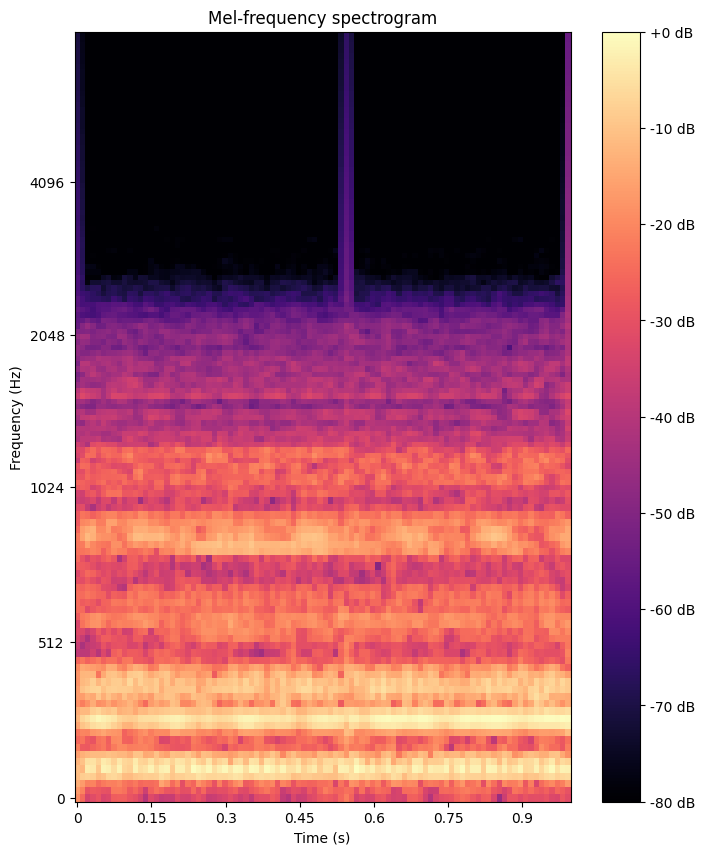

In [83]:
# plot_mel(s0, 'left')
plot_mel(s2, 'around')
# plot_mel(s0, 'right')